<a href="https://colab.research.google.com/github/ahmadSum1/NTNU_mscThesis/blob/SAHI/SAHI_inference_for_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [ ]:
!pip install -U torch sahi yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━

In [ ]:
import os
os.getcwd()

'/content'

- Import required modules:

In [ ]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
import torch
device = "cpu"

if torch.cuda.is_available():
   print("Training on GPU")
   device = "cuda:0"

- Download a yolov5 model and two test images:

In [ ]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device= device
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

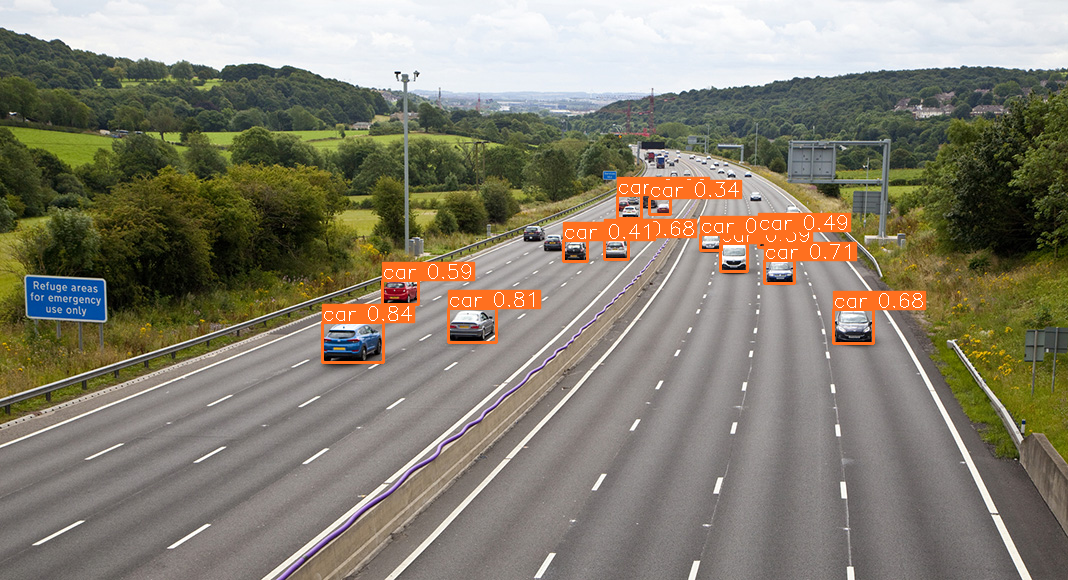

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

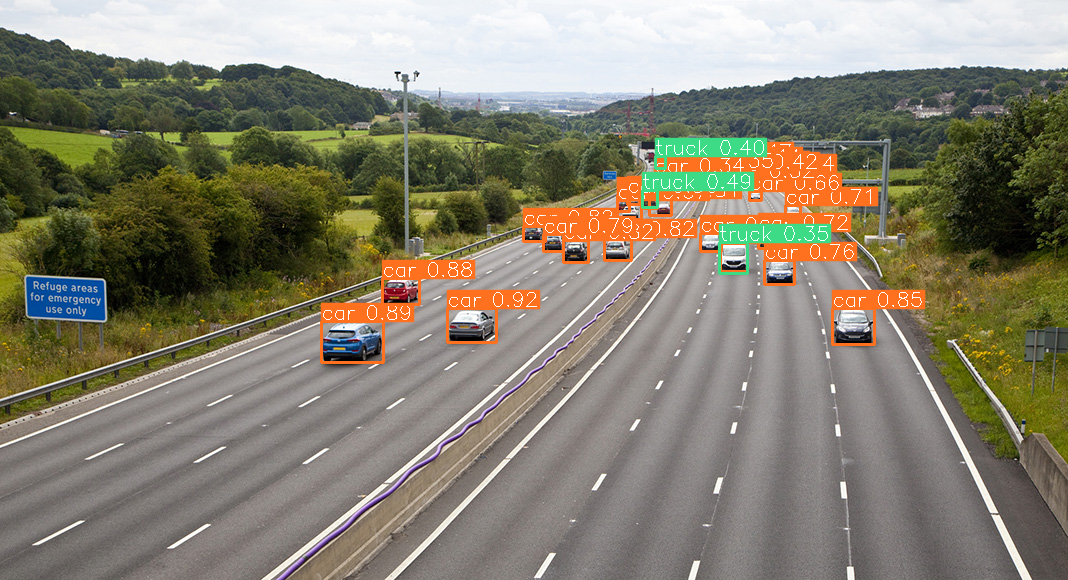

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.5575294494629, 308.2526626586914, 496.90765380859375, 342.8026428222656), w: 49.35012435913086, h: 34.54998016357422>,
    mask: None,
    score: PredictionScore: <value: 0.9154328107833862>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.5575294494629,
   308.2526626586914,
   49.35012435913086,
   34.54998016357422],
  'score': 0.9154328107833862,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': None,
  'bbox': [321.43294525146484,
   321.90821838378906,
   62.172035217285156,
   40.924461364746094],
  'score': 0.8879777789115906,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': None,
  'bbox': [382.0502624511719,
   278.4272003173828,
   36.96442222595215,
   26.353530883789062],
  'score': 0.8796822428703308,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.5575294494629,
   308.2526626586914,
   49.35012435913086,
   34.54998016357422],
  'score': 0.9154328107833862,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': 1,
  'bbox': [321.43294525146484,
   321.90821838378906,
   62.172035217285156,
   40.924461364746094],
  'score': 0.8879777789115906,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': 1,
  'bbox': [382.0502624511719,
   278.4272003173828,
   36.96442222595215,
   26.353530883789062],
  'score': 0.8796822428703308,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
# !pip install imantics
!pip install -U fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '6464efe91cd05d59a95b5afb',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.41906135716241844,
         0.5314701080322266,
         0.04620798160967309,
         0.05956893131650727,
     ],
     'mask': None,
     'confidence': 0.9154328107833862,
     'index': None,
 }>,
 <Detection: {
     'id': '6464efe91cd05d59a95b5afc',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.3009671772017461,
         0.5550141696272225,
         0.058213516121053514,
         0.07055941614611395,
     ],
     'mask': None,
     'confidence': 0.8879777789115906,
     'index': None,
 }>,
 <Detection: {
     'id': '6464efe91cd05d59a95b5afd',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.35772496484192123,
         0.4800468970989359,
         0.03461088223403759,
         0.045437122213429416,
     ],
     'mask': None,
     'confidence': 

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device =  device
model_confidence_threshold = 0.4

slice_height = 50
slice_width = 50
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
pred=predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)


There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 405 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [02:23<04:46, 143.36s/it]

Prediction time is: 143279.41 ms
Performing prediction on 442 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [05:04<02:34, 154.03s/it]

Prediction time is: 161422.83 ms
Performing prediction on 405 number of slices.


Performing inference on images: 100%|██████████| 3/3 [07:29<00:00, 149.75s/it]

Prediction time is: 144288.52 ms
Prediction results are successfully exported to runs/predict/exp7


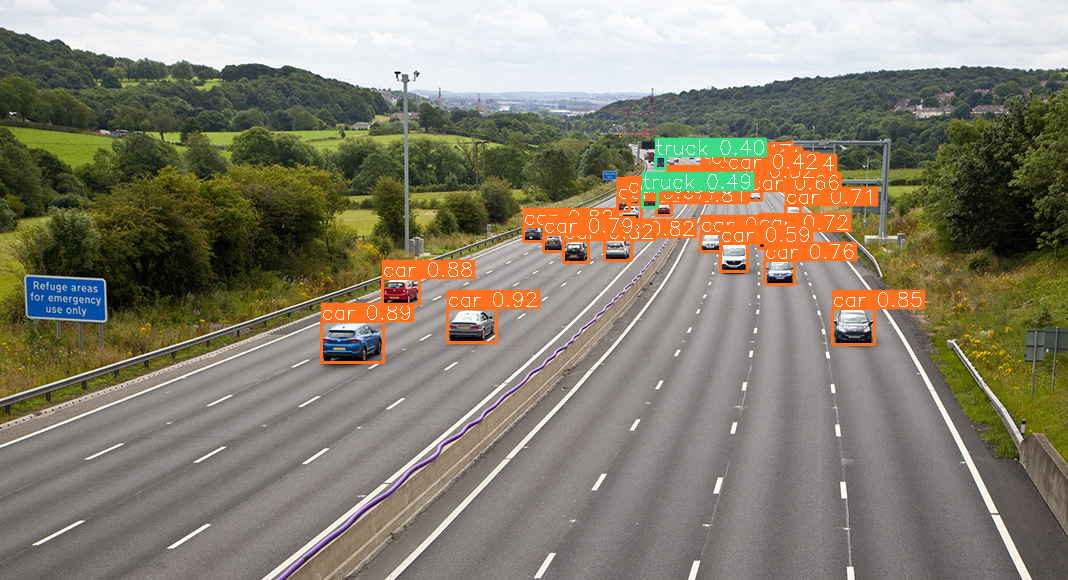

In [ ]:
Image("/content/runs/predict/exp3/visuals/small-vehicles1.png")

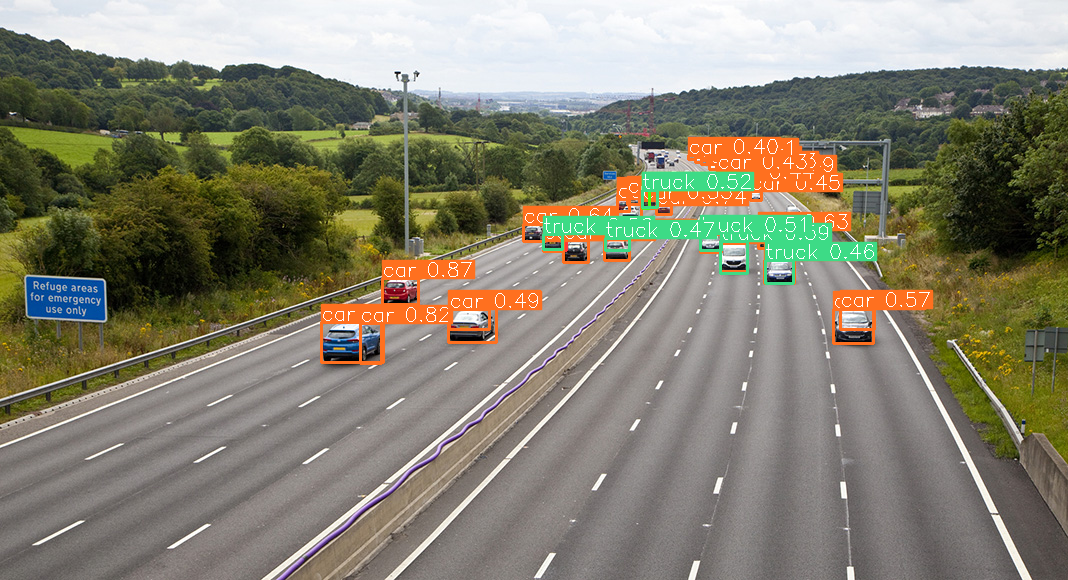

In [ ]:
Image("/content/runs/predict/exp7/visuals/small-vehicles1.png")

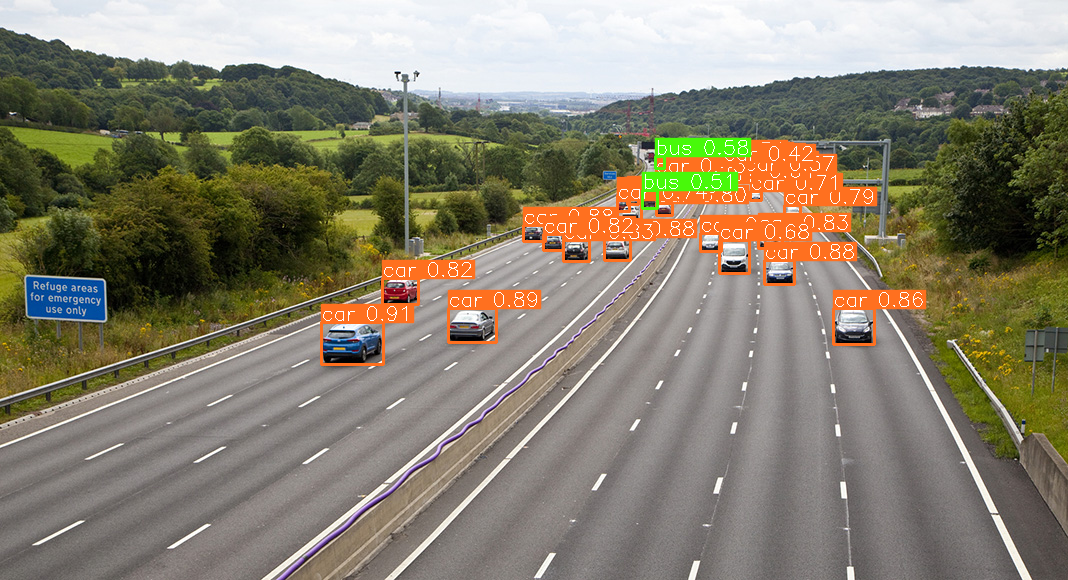

In [ ]:
Image("/content/runs/predict/exp5/visuals/small-vehicles1.png")

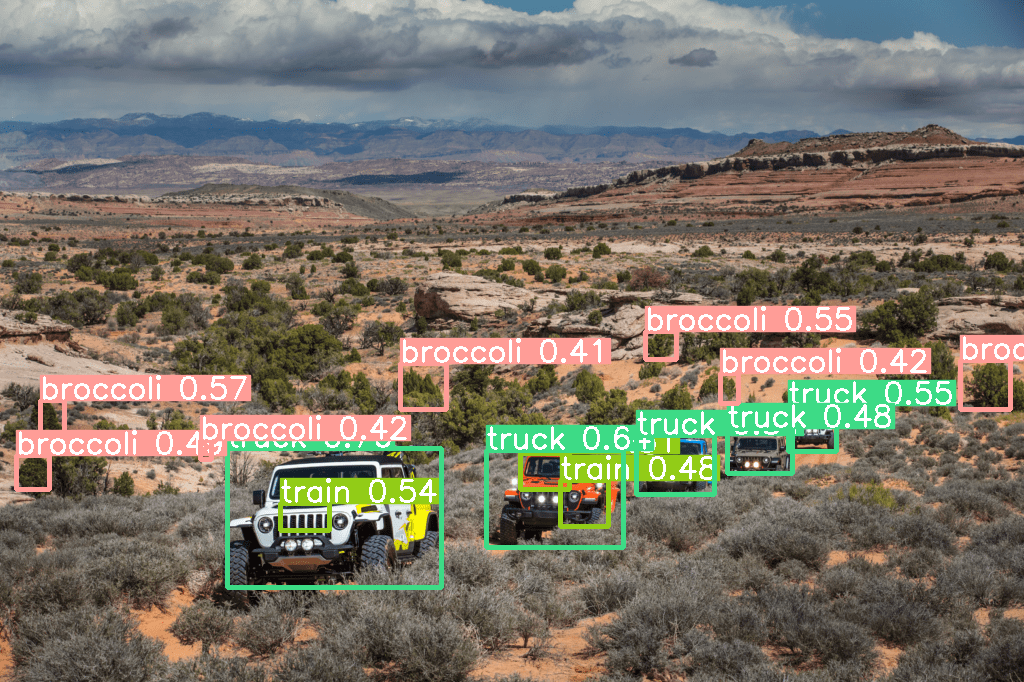

In [ ]:

Image("/content/runs/predict/exp7/visuals/terrain2.png")